# Introdução ao Scikit-learn (Classificadores)

<img src="img\scikit_learn.png" alt="drawing" width="300"/>

O scikit-learn é uma poderosa ferramenta para aprendizado de máquina em python de código aberto (open source) e pode ser usado comercialmente (licença BSD). Construído sobre as bibliotecas NumPy, SciPy e matplotlib, possui ferramentas simples e eficientes para mineração e análise de dados, sendo uma biblioteca acessível e reutilizável em vários contextos.

#### O scikit-learn requer python (> = 3.5)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
heart = pd.read_csv('../../scr/datasets/heart.csv', index_col=0)

In [3]:
heart.columns

Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'ChestPain_asymptomatic',
       'ChestPain_nonanginal', 'Thal_fixed', 'Thal_normal', 'HeartDisease'],
      dtype='object')

In [4]:
len(heart)

297

In [5]:
heart.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,Thal_fixed,Thal_normal,HeartDisease
0,63,1,145,233,1,2,150,0,2.3,3,0,0,0,1,0,No
1,67,1,160,286,0,2,108,1,1.5,2,3,1,0,0,1,Yes
2,67,1,120,229,0,2,129,1,2.6,2,2,1,0,0,0,Yes
3,37,1,130,250,0,0,187,0,3.5,3,0,0,1,0,1,No
4,41,0,130,204,0,2,172,0,1.4,1,0,0,0,0,1,No


In [6]:
print("Proporção de doentes e não doentes: ")

doentes = len(heart[heart["HeartDisease"]=="Yes"])/len(heart)
nao_doentes = len(heart[heart["HeartDisease"]=="No"])/len(heart)
print(f"\n\t - Doentes: {doentes}\n\t - Não Doentes: {nao_doentes}")

Proporção de doentes e não doentes: 

	 - Doentes: 0.4612794612794613
	 - Não Doentes: 0.5387205387205387


## Treino e Teste

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
explicativa = heart.drop(["HeartDisease"], axis=1) # Retirando a coluna com os rótulos
resposta = heart["HeartDisease"]                   # Criando objeto apenas com os rótulos 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(explicativa, 
                                                    resposta, 
                                                    test_size=0.3, 
                                                    stratify=resposta)

In [10]:
X_train.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,Thal_fixed,Thal_normal
33,59,1,135,234,0,0,161,0,0.5,2,0,1,0,0,0
55,54,1,124,266,0,2,109,1,2.2,2,1,1,0,0,0
96,60,0,150,258,0,2,157,0,2.6,2,2,1,0,0,0
274,57,1,154,232,0,2,164,0,0.0,1,1,0,0,0,1
135,70,1,145,174,0,0,125,1,2.6,3,0,1,0,0,0


In [11]:
X_test.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,Thal_fixed,Thal_normal
163,48,1,124,255,1,0,175,0,0.0,1,2,0,1,0,1
30,69,0,140,239,0,0,151,0,1.8,1,2,0,0,0,1
291,59,1,164,176,1,2,90,0,1.0,2,2,1,0,1,0
158,68,1,118,277,0,0,151,0,1.0,1,1,0,1,0,0
142,64,1,125,309,0,0,131,1,1.8,2,0,0,1,0,0


In [12]:
y_train.head()

33      No
55     Yes
96     Yes
274    Yes
135    Yes
Name: HeartDisease, dtype: object

In [13]:
y_test.head()

163     No
30      No
291    Yes
158     No
142    Yes
Name: HeartDisease, dtype: object

Verificando se as propoções permanacem iguais.

In [14]:
print("Proporção de doentes e não doentes: ")
doentes = len(y_train[y_train=="Yes"])/len(y_train)
nao_doentes = len(y_train[y_train=="No"])/len(y_train)

print(f"\n\t - Doentes: {doentes}\n\t - Não Doentes: {nao_doentes}")

Proporção de doentes e não doentes: 

	 - Doentes: 0.45893719806763283
	 - Não Doentes: 0.5410628019323671


## Modelos

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [16]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8666666666666667

In [17]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.5444444444444444

In [18]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8222222222222222

## Avaliação do modelo

### Matriz de confusão

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
logistic_regression = LogisticRegression(solver='liblinear',multi_class='ovr').fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)
cm = confusion_matrix(y_test, y_pred)/len(y_test)
pd.DataFrame(cm)

,0,1
0,0.477778,0.055556
1,0.077778,0.388889


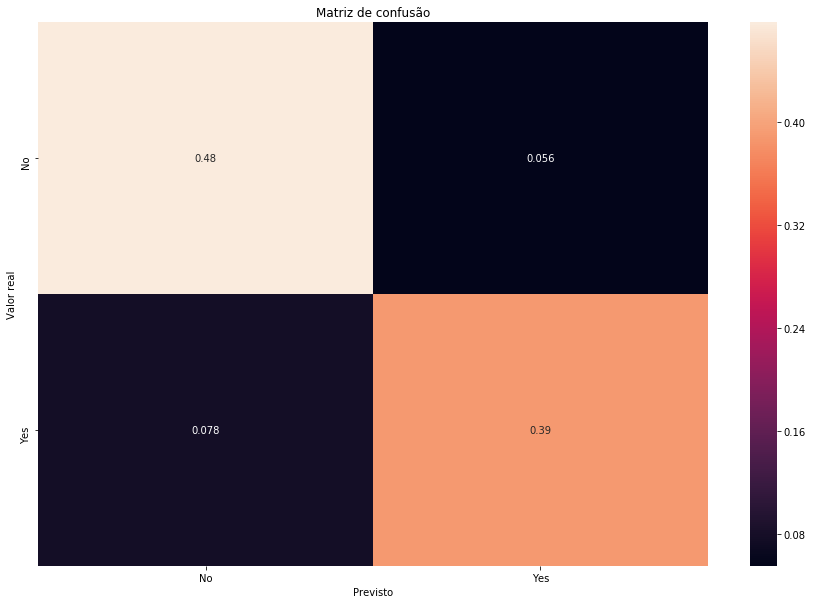

In [21]:
plt.figure(figsize=(15, 10))
ax = plt.subplot()

sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Previsto');ax.set_ylabel('Valor real'); 
ax.set_title('Matriz de confusão'); 
ax.xaxis.set_ticklabels(y_test.unique()); ax.yaxis.set_ticklabels(y_test.unique());
plt.show()

### Métricas da matriz de confusão

In [22]:
from sklearn.metrics import cohen_kappa_score, accuracy_score

#kappa    
print(cohen_kappa_score(y_test, y_pred))
#Acurácia
print(accuracy_score(y_test,y_pred))


0.7313432835820896
0.8666666666666667


## Kfold e Kfold Estratificado

In [23]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [24]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [25]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(explicativa, resposta):
    
    X_train = explicativa.iloc()[train_index].values
    X_test = explicativa.iloc()[test_index].values
    y_train = resposta.iloc()[train_index].dropna()
    y_test = resposta.iloc()[test_index].dropna()

    logistic_regression = LogisticRegression(solver='liblinear',multi_class='ovr')
    svc = SVC(gamma='auto')
    random_florest = RandomForestClassifier(n_estimators=40)
    
    scores_logistic.append(get_score(logistic_regression, X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(svc, X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(random_florest, X_train, X_test, y_train, y_test))

In [26]:
from statistics import mean

In [27]:
mean(scores_logistic)

0.8315694358551501

In [28]:
mean(scores_svm)

0.5421246478389335

In [29]:
mean(scores_rf)

0.8182024324881468

## Cross-Validation

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), 
                explicativa, 
                resposta,cv=3)

array([0.83      , 0.85858586, 0.80612245])

In [32]:
cross_val_score(SVC(gamma='auto'), 
                explicativa, 
                resposta,cv=3)

array([0.54      , 0.53535354, 0.55102041])

In [33]:
cross_val_score(RandomForestClassifier(n_estimators=40), 
                explicativa, 
                resposta,cv=3)

array([0.82      , 0.80808081, 0.78571429])